<a href="https://colab.research.google.com/github/Rajvardhan-singh-26/DL-codes_500108005/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing req lib
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
#Resize images to 32x32 (as VGG16 requires at least 32x32) and keep the last dimension as 1
train_images = tf.image.resize(train_images, (32, 32)).numpy()
test_images = tf.image.resize(test_images, (32, 32)).numpy()

In [ ]:
#Since VGG16/Mobilenet requires 3-channel input, we replicate the grayscale image across 3 channels
train_images = tf.repeat(train_images, 3, axis=-1)
test_images = tf.repeat(test_images, 3, axis=-1)

In [ ]:
#Convert labels to categorical format (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
#Load a pretrained MobileNetV2 model without the classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = models.Sequential([base_model,  layers.Flatten(),  layers.Dense(64, activation='relu'),  layers.Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hisrory = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7664 - loss: 0.8254 - val_accuracy: 0.9429 - val_loss: 0.2028
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9421 - loss: 0.1971 - val_accuracy: 0.9575 - val_loss: 0.1420
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9561 - loss: 0.1455 - val_accuracy: 0.9590 - val_loss: 0.1217
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9618 - loss: 0.1228 - val_accuracy: 0.9659 - val_loss: 0.1070
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9646 - loss: 0.1129 - val_accuracy: 0.9651 - val_loss: 0.1079
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9618 - loss: 0.1196
Test accuracy: 0.9650999903678894


In [ ]:
from tensorflow.keras.datasets import imdb
vocab_size = 5000

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
word_idx = imdb.get_word_index()
word_idx = {idx: word for word, idx in word_idx.items()}

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
 from tensorflow.keras.models import Sequential
 print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
 print("Min length of a review:: ", len(min((x_train+x_test), key=len)))


Max length of a review::  2697
Min length of a review::  70


In [ ]:
from tensorflow.keras.preprocessing import sequence
max_words= 400
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)


In [ ]:
x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding # import Embedding

embd_len= 32
RNN_model= Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size, embd_len, input_length=max_words))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense # import SimpleRNN

embd_len= 32
RNN_model= Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size, embd_len, input_length=max_words))

RNN_model.add(SimpleRNN(128, activation='tanh', return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# prompt: why to use y_train_ not y_train

# In the provided code, `y_train_` is used instead of `y_train` for training the RNN model
# because a portion of the training data is reserved for validation.

# The following lines demonstrate this:
# x_valid, y_valid = x_train[:64], y_train[:64]
# x_train_, y_train_ = x_train[64:], y_train[64:]

# `x_valid` and `y_valid` are created by taking the first 64 elements from `x_train` and `y_train`.
# `x_train_` and `y_train_` are created by taking the remaining elements from `x_train` and `y_train`.

# This is a common practice in machine learning to evaluate the model's performance on a separate dataset
# that was not used during training. This helps to prevent overfitting, where the model performs well on the training data
# but poorly on unseen data.

# By using `y_train_` instead of `y_train`, we ensure that the model is not trained on the validation data.
# This allows for a more accurate evaluation of the model's performance on unseen data.

# In summary, `y_train_` is used instead of `y_train` to prevent the model from overfitting and to ensure a more accurate evaluation of its performance.


In [ ]:
RNN_model.evaluate(x_test, y_test,verbose=0)

[0.6957559585571289, 0.5037999749183655]

In [ ]:
# prompt: why we are finding minimum and max length

# We find the minimum and maximum length of the reviews in the IMDB dataset to understand the distribution of the review lengths.
# This information is useful for deciding on the maximum sequence length (max_words) for padding the input sequences.
# If we set the max_words too short, we might lose some information from longer reviews.
# If we set it too long, we might waste computational resources on padding with zeros.
# By knowing the minimum and maximum lengths, we can make a more informed decision about the appropriate max_words value.

# For example, if the maximum length is significantly longer than the average length, we might consider truncating longer reviews or using techniques like bucketing to handle different lengths more efficiently.


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
print("LOADING YOLO")
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3 (1).cfg")

LOADING YOLO


In [ ]:
classes = []
with open("/content/coco.names", "r") as f:classes = [line.strip() for line  in f.readlines()]


In [ ]:
layer_names = net.getLayerNames()

In [ ]:
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")


YOLO LOADED


Input Image:


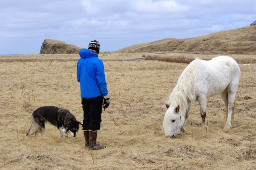

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# If the file exists, try loading it with imread
img = cv2.imread("/content/person.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
print("Input Image:")
cv2_imshow(img)

In [ ]:
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True,crop=False)


In [ ]:
net.setInput(blob)
outs = net.forward(output_layers)

In [ ]:
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.3:
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)


In [ ]:
 # We use NMS function in opencv to perform Nonmaximum Suppression
 # we give it score threshold and nms threshold as arguments.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


In [ ]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[class_ids[i]]

In [ ]:
# Draw the bounding box
cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
 # Draw the label
cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1/2, color, 2)
print(f"Detected object: {label}, confidence: {confidences[i]}, box: {x},{w},{y},{h}")

IndexError: list index out of range

In [ ]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[class_ids[i]]
    # Draw the bounding box
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    # Draw the label
    cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1/2, color, 2)
    # Check if the index is within the bounds of confidences before accessing it
    if i < len(confidences):
        print(f"Detected object: {label}, confidence: {confidences[i]}, box: {x},{w},{y},{h}")

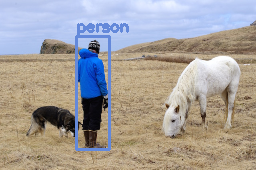

-1

In [ ]:
cv2_imshow(img)
cv2.waitKey(0)